In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing as prepro
from sklearn.metrics import pairwise as pr

In [2]:
# Uploading the dataset onto our dataframe
dataframe = pd.read_csv(r'D:\Kartik Projects\Semester 5\Machine Learning\2023-09-12\Custom_CNN_Features.csv')
print(dataframe.dtypes)

Filename     object
Label         int64
f0          float64
f1          float64
f2          float64
             ...   
f195        float64
f196        float64
f197        float64
f198        float64
f199        float64
Length: 202, dtype: object


In [3]:
# Replacing the Nan values if any
dataframe.replace('?', np.NaN, inplace = True)
dataframe

,Filename,Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,1.png,2,50.557468,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,316.271667,0.0,239.577011,277.834534,205.776398,0.0,0.0,0.0,0.0,91.438698
1,10.jpg.png,2,125.256027,0.0,0.0,0.0,0.0,0.0,48.989120,0,...,1317.333740,0.0,1000.075012,1118.496948,1030.366699,0.0,0.0,0.0,0.0,297.483124
2,10.png,2,50.160606,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,330.470978,0.0,251.886398,288.062134,220.889481,0.0,0.0,0.0,0.0,93.795654
3,100.png,2,63.720730,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,442.839233,0.0,345.145599,389.100678,304.433990,0.0,0.0,0.0,0.0,117.381721
4,10091.jpg,2,64.484604,0.0,0.0,0.0,0.0,0.0,37.368713,0,...,835.147400,0.0,649.643616,693.101868,690.640564,0.0,0.0,0.0,0.0,159.916016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,patch_84.jpg.png,2,283.005707,0.0,0.0,0.0,0.0,0.0,73.068192,0,...,2643.636230,0.0,2036.106934,2269.582275,1973.414917,0.0,0.0,0.0,0.0,657.907715
3249,patch_85.jpg.png,2,609.193603,0.0,0.0,0.0,0.0,0.0,131.018112,0,...,5950.206055,0.0,4727.840820,5170.731934,4594.757324,0.0,0.0,0.0,0.0,1362.733398
3250,patch_86.jpg.png,2,781.789490,0.0,0.0,0.0,0.0,0.0,174.997360,0,...,7535.423828,0.0,5972.883789,6563.629883,5749.376465,0.0,0.0,0.0,0.0,1758.735840
3251,patch_87.jpg.png,2,688.966675,0.0,0.0,0.0,0.0,0.0,206.603851,0,...,7119.000977,0.0,5575.274414,6160.208984,5423.260742,0.0,0.0,0.0,0.0,1670.340088


In [4]:
# Finding the count of the null values
dataframe.isnull().sum()

Filename    0
Label       0
f0          0
f1          0
f2          0
           ..
f195        0
f196        0
f197        0
f198        0
f199        0
Length: 202, dtype: int64

In [5]:
# Applying noramlization on the dataset
scaler = prepro.StandardScaler()
scaled_columns = dataframe.columns[2:] # Features excluding the filename and output label
data_copy = dataframe
scaled_df = scaler.fit_transform(data_copy[scaled_columns])
scaled_df = pd.DataFrame(scaled_df, columns = scaled_columns)
for i in scaled_columns:
    dataframe[i] = scaled_df[i]
dataframe # Normalized dataset

,Filename,Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,1.png,2,0.601397,-0.618413,-1.168573,-1.372193,-0.49427,-1.428815,-0.536962,0.0,...,0.262909,-0.017536,0.197502,0.291041,0.073977,-0.919888,-1.053457,-0.2414,-0.641204,0.114698
1,10.jpg.png,2,1.961047,-0.618413,-1.168573,-1.372193,-0.49427,-1.428815,1.846728,0.0,...,2.084492,-0.017536,2.006370,2.075149,2.058165,-0.919888,-1.053457,-0.2414,-0.641204,1.638106
2,10.png,2,0.594174,-0.618413,-1.168573,-1.372193,-0.49427,-1.428815,-0.536962,0.0,...,0.288746,-0.017536,0.226780,0.312746,0.110343,-0.919888,-1.053457,-0.2414,-0.641204,0.132124
3,100.png,2,0.840993,-0.618413,-1.168573,-1.372193,-0.49427,-1.428815,-0.536962,0.0,...,0.493217,-0.017536,0.448600,0.527177,0.311374,-0.919888,-1.053457,-0.2414,-0.641204,0.306510
4,10091.jpg,2,0.854897,-0.618413,-1.168573,-1.372193,-0.49427,-1.428815,1.281308,0.0,...,1.207081,-0.017536,1.172858,1.172348,1.240692,-0.919888,-1.053457,-0.2414,-0.641204,0.620991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,patch_84.jpg.png,2,4.832376,-0.618413,-1.168573,-1.372193,-0.49427,-1.428815,3.018356,0.0,...,4.497900,-0.017536,4.470605,4.518058,4.327396,-0.919888,-1.053457,-0.2414,-0.641204,4.302939
3249,patch_85.jpg.png,2,10.769587,-0.618413,-1.168573,-1.372193,-0.49427,-1.428815,5.838056,0.0,...,10.514704,-0.017536,10.872980,10.675068,10.635058,-0.919888,-1.053457,-0.2414,-0.641204,9.514132
3250,patch_86.jpg.png,2,13.911145,-0.618413,-1.168573,-1.372193,-0.49427,-1.428815,7.977977,0.0,...,13.399247,-0.017536,13.834355,13.631168,13.413385,-0.919888,-1.053457,-0.2414,-0.641204,12.442012
3251,patch_87.jpg.png,2,12.221601,-0.618413,-1.168573,-1.372193,-0.49427,-1.428815,9.515871,0.0,...,12.641503,-0.017536,12.888628,12.775002,12.628662,-0.919888,-1.053457,-0.2414,-0.641204,11.788450


In [6]:
# Question A1:
# Applying the class mean / centroid values
class_2_values = dataframe.loc[dataframe['Label']==2, dataframe.columns[2:]] # Feature vectors for Label value 2
class_1_values = dataframe.loc[dataframe['Label']==1, dataframe.columns[2:]] # Feature vectors for Label value 1
class_0_values =  dataframe.loc[dataframe['Label']==0, dataframe.columns[2:]] # Feature vectors for Label value 0
class_2_mean_values = class_2_values.mean() # Class centroid of Label 2
class_1_mean_values = class_1_values.mean() # Class centroid of Label 1
class_0_mean_values = class_0_values.mean() # Class centroid of Label 0
print('The class centroid of class label 2 is: \n',class_2_mean_values)
print('The class centroid of class label 1 is: \n', class_1_mean_values)
print('The class centroid of class label 0 is: \n', class_0_mean_values)

The class centroid of class label 2 is: 
 f0      1.381858
f1     -0.612862
f2     -1.147515
f3     -1.321409
f4     -0.493808
          ...   
f195   -0.910381
f196   -1.037017
f197   -0.241400
f198   -0.639582
f199    1.021680
Length: 200, dtype: float64
The class centroid of class label 1 is: 
 f0     -0.317818
f1     -0.568724
f2     -0.279120
f3     -0.111799
f4     -0.476218
          ...   
f195   -0.450972
f196   -0.383685
f197   -0.240536
f198   -0.577685
f199   -0.545527
Length: 200, dtype: float64
The class centroid of class label 0 is: 
 f0     -0.246496
f1      1.208482
f2      1.045764
f3      0.879577
f4      1.001563
          ...   
f195    1.185160
f196    1.148643
f197    0.501597
f198    1.236646
f199    0.298734
Length: 200, dtype: float64


In [7]:
# Applying the intraclass class spread
class_2_spread = class_2_values.var() # Class spread in Label 2
class_1_spread = class_1_values.var() # Class spread in Label 1
class_0_spread = class_0_values.var() # Class spread in Label 0
print('The intra-class spread of class label 2 is: \n',class_2_mean_values)
print('The intra-class spread of class label 1 is: \n', class_1_mean_values)
print('The intra-class spread of class label 0 is: \n', class_0_mean_values)

The intra-class spread of class label 2 is: 
 f0      1.381858
f1     -0.612862
f2     -1.147515
f3     -1.321409
f4     -0.493808
          ...   
f195   -0.910381
f196   -1.037017
f197   -0.241400
f198   -0.639582
f199    1.021680
Length: 200, dtype: float64
The intra-class spread of class label 1 is: 
 f0     -0.317818
f1     -0.568724
f2     -0.279120
f3     -0.111799
f4     -0.476218
          ...   
f195   -0.450972
f196   -0.383685
f197   -0.240536
f198   -0.577685
f199   -0.545527
Length: 200, dtype: float64
The intra-class spread of class label 0 is: 
 f0     -0.246496
f1      1.208482
f2      1.045764
f3      0.879577
f4      1.001563
          ...   
f195    1.185160
f196    1.148643
f197    0.501597
f198    1.236646
f199    0.298734
Length: 200, dtype: float64


In [8]:
# Finding the inter-class distance between classes
class_distance_0_1 = np.linalg.norm(class_0_mean_values - class_1_mean_values) # Class spread between Label 0 and Label 1
class_distance_1_2 = np.linalg.norm(class_1_mean_values - class_2_mean_values) # Class spread between Label 1 and Label 2
class_distance_2_0 = np.linalg.norm(class_2_mean_values - class_0_mean_values) # Class spread between Label 2 and Label 0
print('The distance between the centroids of class 0 and class 1: \n', class_distance_0_1)
print('The distance between the centroids of class 1 and class 2: \n', class_distance_1_2)
print('The distance between the centroids of class 2 and class 0: \n', class_distance_2_0)

The distance between the centroids of class 0 and class 1: 
 12.955937657203183
The distance between the centroids of class 1 and class 2: 
 16.350052264089747
The distance between the centroids of class 2 and class 0: 
 21.084414223061767


0        0.292262
1        2.034029
2        0.316589
3        0.518168
4        1.111511
          ...    
3248     4.511803
3249    10.667597
3250    13.624331
3251    12.760688
3252     3.110595
Name: f132, Length: 3253, dtype: float64
The mean of the feature f132 is:  0.0 



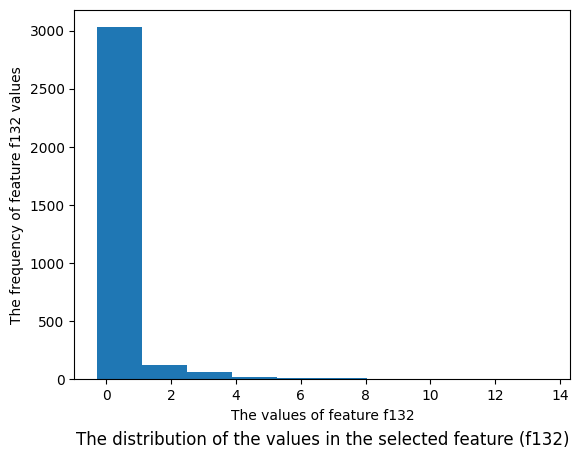

In [9]:
# Question A2:
# Feature density pattern and finding mean and variance
feature_taken = dataframe['f132']
print(feature_taken)# We have taken feature f132 to analyze

plt.hist(feature_taken)
plt.xlabel('The values of feature f132')
plt.ylabel('The frequency of feature f132 values')
plt.title('The distribution of the values in the selected feature (f132)', y=-0.2)

mean_feature = feature_taken.mean() # Using the histogram to calculate mean of the feature f132
print('The mean of the feature f132 is: ', mean_feature, '\n')
variance_feture = feature_taken.var() # Using the histogram to calculate variance of the feature f132

In [10]:
# Question A3:
# Taking two feature vectors and finding distances between them
from math import *
from decimal import Decimal

# Function to make the root value
def p_root(value, root):
    root_value = 1 / float(root)
    return Decimal(value) ** Decimal(root_value)

# Finding the minkowski distance
def minkowski_distance(x, y, p_value):
    return (p_root(sum(pow(abs(a-b), p_value)for a, b in zip(x, y)), p_value))

feature_vector_1 = dataframe.iloc[455, 2:] # Using the 456 feature vector
feature_vector_2 = dataframe.iloc[1860, 2:] # Using the 1861 feature vector

# Finding the minkowski distance of order 1
minkowski_distance_1 = minkowski_distance(feature_vector_1, feature_vector_2, 1)
print('The minkowski distance of r value 1 on these features is: ', minkowski_distance_1, '\n')
# Finding the minkowski distance of order 2
minkowski_distance_2 = minkowski_distance(feature_vector_1, feature_vector_2, 2)
print('The minkowski distance of r value 2 on these features is:', minkowski_distance_2, '\n')
# Finding the minkowski distance of order 3
minkowski_distance_3 = minkowski_distance(feature_vector_1, feature_vector_2, 3)
print('The minkowski distance of r value 3 on these features is:', minkowski_distance_3, '\n')
# Finding the minkowski distance of order 4
minkowski_distance_4 = minkowski_distance(feature_vector_1, feature_vector_2, 4)
print('The minkowski distance of r value 4 on these features is:', minkowski_distance_4, '\n')
# Finding the minkowski distance of order 5
minkowski_distance_5 = minkowski_distance(feature_vector_1, feature_vector_2, 5)
print('The minkowski distance of r value 5 on these features is:', minkowski_distance_5, '\n')
# Finding the minkowski distance of order 6
minkowski_distance_6 = minkowski_distance(feature_vector_1, feature_vector_2, 6)
print('The minkowski distance of r value 6 on these features is:', minkowski_distance_6, '\n')
# Finding the minkowski distance of order 7
minkowski_distance_7 = minkowski_distance(feature_vector_1, feature_vector_2, 7)
print('The minkowski distance of r value 7 on these features is:', minkowski_distance_7, '\n')
# Finding the minkowski distance of order 8
minkowski_distance_8 = minkowski_distance(feature_vector_1, feature_vector_2, 8)
print('The minkowski distance of r value 8 on these features is:', minkowski_distance_8, '\n')
# Finding the minkowski distance of order 9
minkowski_distance_9 = minkowski_distance(feature_vector_1, feature_vector_2, 9)
print('The minkowski distance of r value 9 on these features is:', minkowski_distance_9, '\n')
# Finding the minkowski distance of order 10
minkowski_distance_10 = minkowski_distance(feature_vector_1, feature_vector_2, 10)
print('The minkowski distance of r value 10 on these features is:', minkowski_distance_10, '\n')

The minkowski distance of r value 1 on these features is:  174.3827182363492624972423073 

The minkowski distance of r value 2 on these features is: 19.30120157037221363331330130 

The minkowski distance of r value 3 on these features is: 9.603821504596480132282269809 

The minkowski distance of r value 4 on these features is: 6.864128706358442342152720852 

The minkowski distance of r value 5 on these features is: 5.651548546520127051170143376 

The minkowski distance of r value 6 on these features is: 4.988775436039059020464507952 

The minkowski distance of r value 7 on these features is: 4.580984239787058803080565198 

The minkowski distance of r value 8 on these features is: 4.311396478943658589981115359 

The minkowski distance of r value 9 on these features is: 4.125072370510238155337542365 

The minkowski distance of r value 10 on these features is: 3.992803250455353734695404418 



In [11]:
# Question A4:
# Dividing the dataset into training set and testing set
from sklearn.model_selection import train_test_split
# Dataset will have classes 0 and 2
data_to_input = dataframe.loc[dataframe['Label'] != 1, dataframe.columns[2:]] # input data
data_to_output  = dataframe.loc[dataframe['Label'] != 1, dataframe.columns[1]] # output data
Data_train_knn, Data_test_knn, Output_train_knn, Output_test_knn = train_test_split(data_to_input, data_to_output, test_size = 0.3)

In [12]:
# Question A5:
# Applying the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
Classification_knn = KNeighborsClassifier(n_neighbors = 3) # k value of the classifier is 3
Classification_knn.fit(Data_train_knn, Output_train_knn)

KNeighborsClassifier(n_neighbors=3)

In [13]:
# Question A6:
# Testing the accuracy of the kNN classifier
print(Classification_knn.score(Data_test_knn.values, Output_test_knn.values))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9917695473251029


In [14]:
# Question A7:
# Predicting the behavior of the test cases
prediction_k3 = Classification_knn.predict(Data_test_knn.values)
print(prediction_k3)

[0 2 0 0 0 2 0 0 2 0 0 2 2 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 2 2 0 2 0 0 0 0 2
 0 0 0 2 0 2 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 2 2 0
 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0 2 2 2 0 2 0 0 0 2 0 0 0 0 0 0 2 0 2 0 0 2
 2 2 0 0 0 0 2 0 2 2 0 2 0 2 0 2 2 2 0 0 2 0 0 0 0 0 2 2 2 0 0 2 0 2 0 2 2
 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 2 2 2 0 2 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 2 0 0 2 0 0 0 2 0 0 0 0 0 2 2 2 2 0 0 2 0 0 2 0 0 2 0 0 0 2
 2 2 0 0 2 2 2 0 0 2 0 2 0 0 2 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 2 0 0 0 0
 0 2 0 2 0 0 2 2 0 0 0 2 2 2 0 2 0 0 0 0 2 0 0 2 2 2 0 2 2 0 2 0 0 0 2 0 2
 0 0 2 2 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 2 2 0 0 0 0 2 2 2 2 2 2 2
 2 0 2 2 0 0 0 0 0 2 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 2 2 0 2 2 0 0 0 0 0 0 0
 0 0 0 2 2 0 2 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 2 2 0 2 0
 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 2 0 2 2 0 0 0 2
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 0 2 2 0]


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [15]:
# Printing the classification score
# Accuracy of the training data
from sklearn.metrics import accuracy_score
print("The accuracy of the training data is: ", Classification_knn.score(Data_train_knn.values, Output_train_knn.values))

# Accuracy of the testing data
print("The accuracy of the testing data is: ", Classification_knn.score(Data_test_knn.values, Output_test_knn.values))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The accuracy of the training data is:  0.9947043248014121
The accuracy of the testing data is:  0.9917695473251029


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid fe

[0.9938271604938271, 0.9917695473251029, 0.9917695473251029, 0.9897119341563786, 0.9897119341563786, 0.9897119341563786, 0.9917695473251029, 0.9897119341563786, 0.9917695473251029, 0.9917695473251029, 0.9917695473251029]


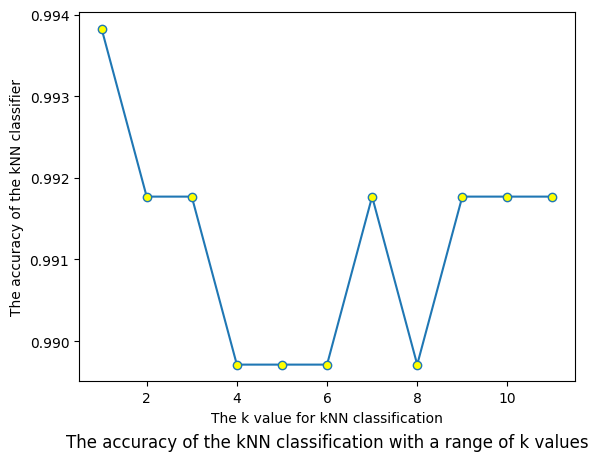

In [16]:
# Question A8:
# Implementing kNN classifiers from k = 1 to 11 and finding their accuracies
accuracy_test = []
for i in range(1, 12):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(Data_train_knn, Output_train_knn)
    prediction = KNN.predict(Data_test_knn.values)
    accuracy_test.append(accuracy_score(prediction, Output_test_knn))
print(accuracy_test)
# The accuracy values of knn classifiers accuracy values
plt.plot(np.arange(1, 12), accuracy_test, marker = 'o', mfc='yellow')
plt.xlabel("The k value for kNN classification")
plt.ylabel("The accuracy of the kNN classifier")
plt.title("The accuracy of the kNN classification with a range of k values", y=-0.2)
plt.show()

In [17]:
# Question A9:
# Creating the Confusion Matrix and calculating the precision, recall and f1 score
from sklearn.metrics import confusion_matrix, classification_report
# We are doing the confusion matrix for kNN classifier for k =3 neighbors
print(confusion_matrix(prediction_k3, Output_test_knn))# Confusion matrix

[[322   4]
 [  0 160]]


In [18]:
# Giving the precision, recall and f1-score values
from sklearn.metrics import classification_report
print(classification_report(prediction_k3, Output_test_knn))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       326
           2       0.98      1.00      0.99       160

    accuracy                           0.99       486
   macro avg       0.99      0.99      0.99       486
weighted avg       0.99      0.99      0.99       486

